In [1]:
import sys, traceback
import cv2
import os
import re
import numpy as np
import string
from plantcv import plantcv as pcv

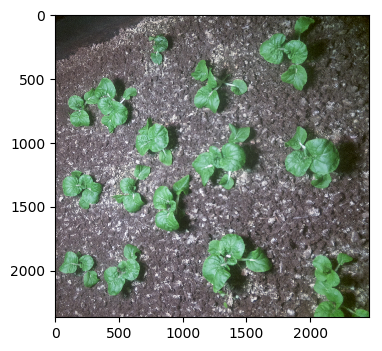

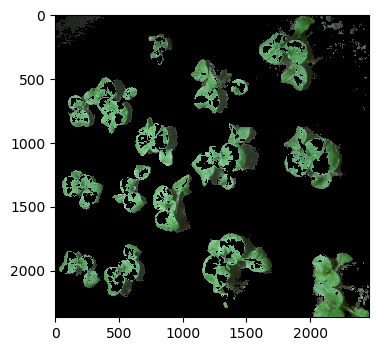

In [2]:
# Read image
img, path, filename = pcv.readimage("RGB_20191028_165124.png")
pcv.params.debug=True

if np.average(img) < 50:
    pcv.fatal_error("Night Image")
else:
    pass

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, (36, 25, 25), (70, 255,255))

## slice the green
imask = mask>0
green = np.zeros_like(img, np.uint8)
green[imask] = img[imask]
pcv.plot_image(img)
pcv.plot_image(green)

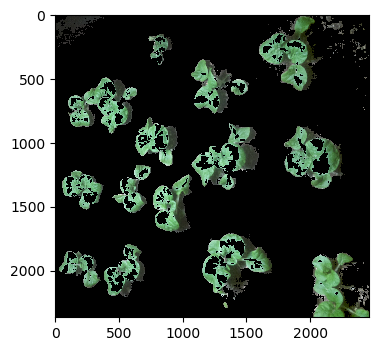

In [3]:
img1 = pcv.white_balance(img=green)
pcv.plot_image(img1)

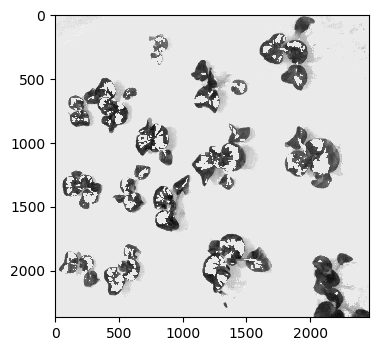

In [4]:
a = pcv.rgb2gray_lab(rgb_img=img1, channel='a')
pcv.plot_image(a)

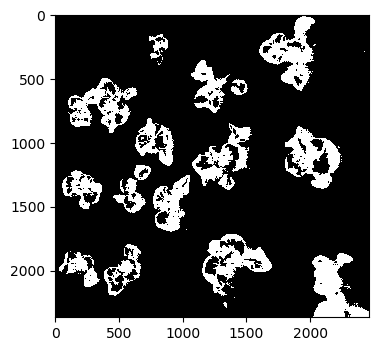

In [5]:
img_binary = pcv.threshold.binary(gray_img=a, threshold=120, max_value=225, object_type='dark')
pcv.plot_image(img_binary)

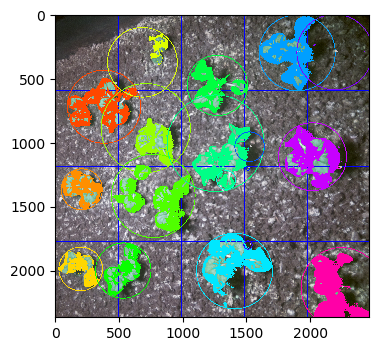

AttributeError: 'numpy.ndarray' object has no attribute 'savefig'

In [7]:
id_objects, obj_hierarchy = pcv.find_objects(img=img1, mask=img_binary)
roi_contour, roi_hierarchy = pcv.roi.rectangle(img=img1, x=0, y=0, h=2367, w=2463)

roi_objects, roi_obj_hierarchy, kept_mask, obj_area = pcv.roi_objects(img=img1, roi_contour=roi_contour, 
                                                                          roi_hierarchy=roi_hierarchy,
                                                                          object_contour=id_objects,
                                                                          obj_hierarchy=obj_hierarchy, 
                                                                          roi_type='partial')
clusters_i, contours, hierarchies = pcv.cluster_contours(img=img1, roi_objects=roi_objects, 
                                                             roi_obj_hierarchy=roi_obj_hierarchy, 
                                                             nrow=4, ncol=5)

pcv.params.debug = "print"
# Create a figure using output from pcv.cluster_contours with a grid
clustered_image = pcv.visualize.clustered_contours(img=img, grouped_contour_indices=clusters_i, 
                                                   roi_objects=contours,
                                                   roi_obj_hierarchy=hierarchies,
                                                   nrow=4, ncol=5)
pcv.plot_image(clustered_image)
#print(clustered_image)
clustered_image.savefig('clustered_image_my_overlap.png')